# Classification model using Random Forest

### 1. Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

### 2. Upload RNA data

In [2]:
path ='C:/Users/sandr/Documents/ART_project/GNN model/Data/PPT-Ohmnet/mRCC_big_pool/Second big pool/mrcc_protein_matrix_163_genes_48_nodes.csv'
data = pd.read_csv(path)
data.head(5)

,Unnamed: 0,ANXA1,ANXA2,APAF1,ARID1A,ATM,BAP1,CASP2,CDKN2A,CRADD,...,SETD2,SLC2A1,SOD2,TGM2,TP53,TSC1,TSC2,VEGFA,VHL,Y
0,0,33.868001,37.396638,32.668769,33.848026,35.942429,33.677294,33.689015,33.329382,34.20040,...,32.58565,33.38586,38.67433,38.50142,33.83518,32.93402,34.93520,37.79678,32.30615,1
1,1,35.085434,36.570671,32.337493,33.843513,35.988225,32.643149,33.946812,32.503791,33.33414,...,33.19915,33.69538,38.64559,34.33752,34.44810,33.16630,35.08304,40.09193,32.19988,1
2,2,34.908372,38.443020,31.818198,33.516005,36.193587,32.368866,33.752815,32.561812,31.15063,...,32.84628,36.23588,40.50559,35.50178,35.41980,33.63282,34.79244,38.22308,31.49147,1
3,3,36.290124,37.244829,32.601293,34.197698,36.578348,31.895400,34.064332,30.368889,32.93107,...,33.68316,34.41938,38.99231,35.77236,34.18862,32.88250,35.02014,39.94908,32.11538,0
4,4,36.863272,36.871693,33.593121,33.351460,36.807497,33.968348,33.501184,24.501619,33.49363,...,34.63036,34.59911,38.41437,33.47112,34.91241,33.44515,35.01310,39.31564,33.33646,1


In [3]:
X = data.iloc[:,1:49  ] 
Y = []
for i in range (len(data)):
    if data.Y[i]==0: # If PFS is lower than 3 months, I will consider it as NonResponder (NR)
        Y.append(0)
    else:
        Y.append(1)# If PFS is over 3 months, I will consider it as Responder (R)
print(X)
print('Numero de pacientes: ',len(Y))

         ANXA1      ANXA2      APAF1     ARID1A        ATM       BAP1  \
0    33.868001  37.396638  32.668769  33.848026  35.942429  33.677294   
1    35.085434  36.570671  32.337493  33.843513  35.988225  32.643149   
2    34.908372  38.443020  31.818198  33.516005  36.193587  32.368866   
3    36.290124  37.244829  32.601293  34.197698  36.578348  31.895400   
4    36.863272  36.871693  33.593121  33.351460  36.807497  33.968348   
..         ...        ...        ...        ...        ...        ...   
176  35.985233  37.436964  32.603769  34.133940  35.318612  33.843872   
177  37.586062  37.635004  33.619701  32.373330  35.771711  32.519967   
178  36.111194  37.953757  33.316811  34.118843  36.008091  33.115209   
179  35.120811  35.957212  33.046782  33.833796  37.008936  32.895151   
180  34.648929  38.196845  32.170042  33.739764  35.937812  33.404526   

         CASP2     CDKN2A     CRADD     CRYAB  ...    RNF139     SETD2  \
0    33.689015  33.329382  34.20040  39.95791  ..

### 3. Train-Test dataset split

In [4]:
XTrain, XTest, yTrain, yTest = train_test_split(X, Y, test_size=0.20, random_state=125, stratify=Y)

# Convert sets to arrays
XTrain = XTrain.values
XTest = XTest.values

print('Training set size:', len(XTrain))
print('Target column size of the training set:', len(yTrain))
print('Test set size:', len(XTest))
print('Target column size of the test set:', len(yTest))

Training set size: 144
Target column size of the training set: 144
Test set size: 37
Target column size of the test set: 37


### 4. Select the parameters of the model and fit it

In [5]:
param_grid = {'min_samples_leaf': [1, 2, 3],
              'min_samples_split': [2, 3, 4, 5],
              'random_state':[125],
              'n_estimators': [10, 20],
              'bootstrap': [True, False],
              'criterion': ['gini', 'entropy'],
              'max_depth':[None, 2, 5, 10,50]
              }

# I created a GridSearchCV which allows us to systematically evaluate and select the parameters of our model.
# By indicating a model and the parameters to test, you can evaluate the performance of the first one based on the
# seconds through cross validation.
clf = GridSearchCV(
        estimator  = RandomForestClassifier(),
        param_grid = param_grid,
        cv=5
       )

clf.fit(XTrain , yTrain)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 5, 10, 50],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [10, 20], 'random_state': [125]})

In [6]:
print("Best estimate of parameters according to GridSearchCV:")
model = clf.best_estimator_
# Fit the model with the best parameters
model.fit(XTrain , yTrain)

Best estimate of parameters according to GridSearchCV:


RandomForestClassifier(bootstrap=False, min_samples_split=5, n_estimators=10,
                       random_state=125)

In [7]:
print("Best result of the cross validation of the model with the best paramters:" +str(clf.best_score_))

Best result of the cross validation of the model with the best paramters:0.5689655172413792


### 5. Prediction

In [8]:
# Making predictions with the optimal model on the training dataset
yhatTrain = model.predict(XTrain)
contTrain = 0

# Comparing with the Target column and check how many hits there have been
for i in range(0,len(yTrain),1) :
    if (yhatTrain[i] == yTrain[i]):
        contTrain = contTrain + 1

In [9]:
# Making predictions with the optimal model on the test dataset
yhatTest = model.predict(XTest)
contTest = 0

# Comparing with the Target column and check how many hits there have been
for i in range(0,len(yTest),1) :
    if (yhatTest[i] == yTest[i]):
        contTest = contTest + 1


### 6. Results

In [10]:
print('Final accuracy on the training dataset:' + str(contTrain/len(yTrain)))
print('Final accuracy on the testing dataset: ' + str(contTest/len(yTest)))

Final accuracy on the training dataset:1.0
Final accuracy on the testing dataset: 0.5675675675675675


In [11]:
from sklearn.metrics import classification_report,confusion_matrix

print('----------------Confusion Matrix (Training)------------------')
print(confusion_matrix(yTrain,yhatTrain))
print('Input data:  ' + str(np.array(yTrain)))
print('Prediction:        ' +str(yhatTrain))

----------------Confusion Matrix (Training)------------------
[[68  0]
 [ 0 76]]
Input data:  [1 0 1 0 1 1 0 0 1 0 1 0 1 0 1 1 0 1 1 1 0 0 0 1 0 0 0 0 0 1 1 1 1 1 0 1 1
 0 0 1 1 1 1 1 0 0 1 1 1 0 0 0 1 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 1 0 1 0 0
 0 1 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 1 0 1 0 0 1 0 1 0 0 1 0 0 1 1 1 1 0 1 1
 1 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1 1 0 0 0 1 0 1 0 0 0 1 1 1 1 1 0 1]
Prediction:        [1 0 1 0 1 1 0 0 1 0 1 0 1 0 1 1 0 1 1 1 0 0 0 1 0 0 0 0 0 1 1 1 1 1 0 1 1
 0 0 1 1 1 1 1 0 0 1 1 1 0 0 0 1 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 1 0 1 0 0
 0 1 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 1 0 1 0 0 1 0 1 0 0 1 0 0 1 1 1 1 0 1 1
 1 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1 1 0 0 0 1 0 1 0 0 0 1 1 1 1 1 0 1]


In [12]:
print(classification_report(yTrain,yhatTrain))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        68
           1       1.00      1.00      1.00        76

    accuracy                           1.00       144
   macro avg       1.00      1.00      1.00       144
weighted avg       1.00      1.00      1.00       144



In [13]:
print('----------------Confusion Matrix (Test)------------------')
print(confusion_matrix(yTest,yhatTest))
print('Input data:  ' + str(np.array(yTest)))
print('Prediction:        ' +str(yhatTest))

----------------Confusion Matrix (Test)------------------
[[ 9  8]
 [ 8 12]]
Input data:  [0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 1 1 0 1 0]
Prediction:        [0 1 1 1 0 0 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0 1 1 0 0 1 0 1 0 1 1 0 1 1 1 0 0]


In [14]:
print(classification_report(yTest,yhatTest))

              precision    recall  f1-score   support

           0       0.53      0.53      0.53        17
           1       0.60      0.60      0.60        20

    accuracy                           0.57        37
   macro avg       0.56      0.56      0.56        37
weighted avg       0.57      0.57      0.57        37



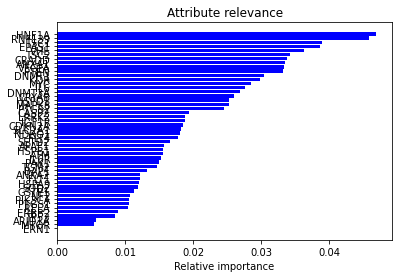

ANXA1 = 0.03344843311496199
ANXA2 = 0.012142079609635351
APAF1 = 0.015686039800626106
ARID1A = 0.005697160325604376
ATM = 0.015532261834857081
BAP1 = 0.013162225730164085
CASP2 = 0.019442928927998003
CDKN2A = 0.0184694131174269
CRADD = 0.03383733954166223
CRYAB = 0.025938651518713367
DNMT1 = 0.030362009912768672
DNMT3A = 0.026925089316267924
EPAS1 = 0.038694790735748476
ERBB2 = 0.008976479629995785
ERN1 = 0.0
FLT1 = 0.01212080877683734
FLT4 = 0.01783471294119882
GSTP1 = 0.011275822444055
HNF1A = 0.0468838754987852
HSPA9 = 0.012060262693083149
HSPB1 = 0.01554354906353092
HSPD1 = 0.025284490919798563
IGF1R = 0.018732241260658207
IL6 = 0.02756565246743316
IL6R = 0.015293689679207528
KDR = 0.02981533289769293
LRRK2 = 0.01879171515217457
MAPK8 = 0.025241095696523698
MTOR = 0.005414523195286144
MYC = 0.02853225570933245
NDRG1 = 0.01805691706053019
NF2 = 0.010721837935983273
PAK1 = 0.014904062893334905
PIK3CA = 0.010528765233024423
PTEN = 0.03319345104594569
PTGS1 = 0.01052394829262858
PTGS2 

In [15]:
# Through the created model we can see which attributes are the most significant to make a decision.
# The most relevant attributes will be the ones placed at the top of the tree.
features = list(X)
importances = model.feature_importances_
indices = np.argsort(importances)

plt.title('Attribute relevance')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative importance')
plt.show()

for name, importance in zip(X, model.feature_importances_):
    print(name, "=", importance)

# Attributes whose relevance is 0, will not be necessary to make the prediction of the target.